# Modelo Lotka-Volterra a las especies del SARS COV-2
## Objetivos generales

#### 1. Parametros LV
```
2. Diagramas de Fase
3. Evolución Temporal
4. Bifurcaciónes
5. Regiones de convergencia
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg

### Base de Datos SARS COV-2
    > Estados Unidos
    > Asia Oriental
    > Asia Occidental
    > America del Sur

In [2]:
df = pd.read_csv('tabla.csv')
USA = ['USA-G1', 'USA-G2', 'USA-G3', 'USA-G4','USA-G5']
Asia1 = ['Asia1-G1', 'Asia1-G2', 'Asia1-G3', 'Asia1-G4']
Asia2 = ['Asia2-G1', 'Asia2-G2', 'Asia2-G3', 'Asia2-G4']
America =  ['AmerSur-G2', 'AmerSur-G3']

In [49]:
#df['USA-G1'][100:150]

<Figure size 432x288 with 0 Axes>

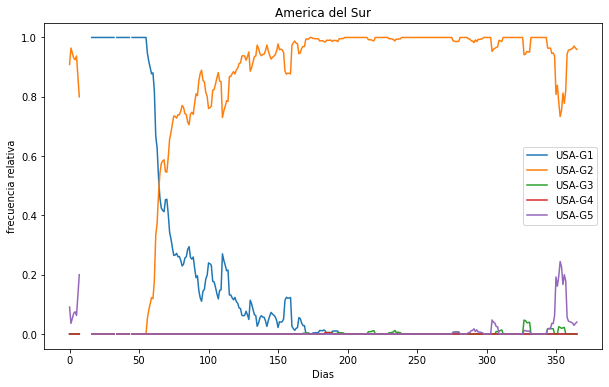

In [16]:
plt.figure()
df.plot(y=USA, title='America del Sur', xlabel='Dias', ylabel='frecuencia relativa', figsize=(10,6))
plt.show()

### Lista de especies en una region

In [7]:
USA1 = [USA[0], USA[1]]
lst = df[USA1].to_numpy()

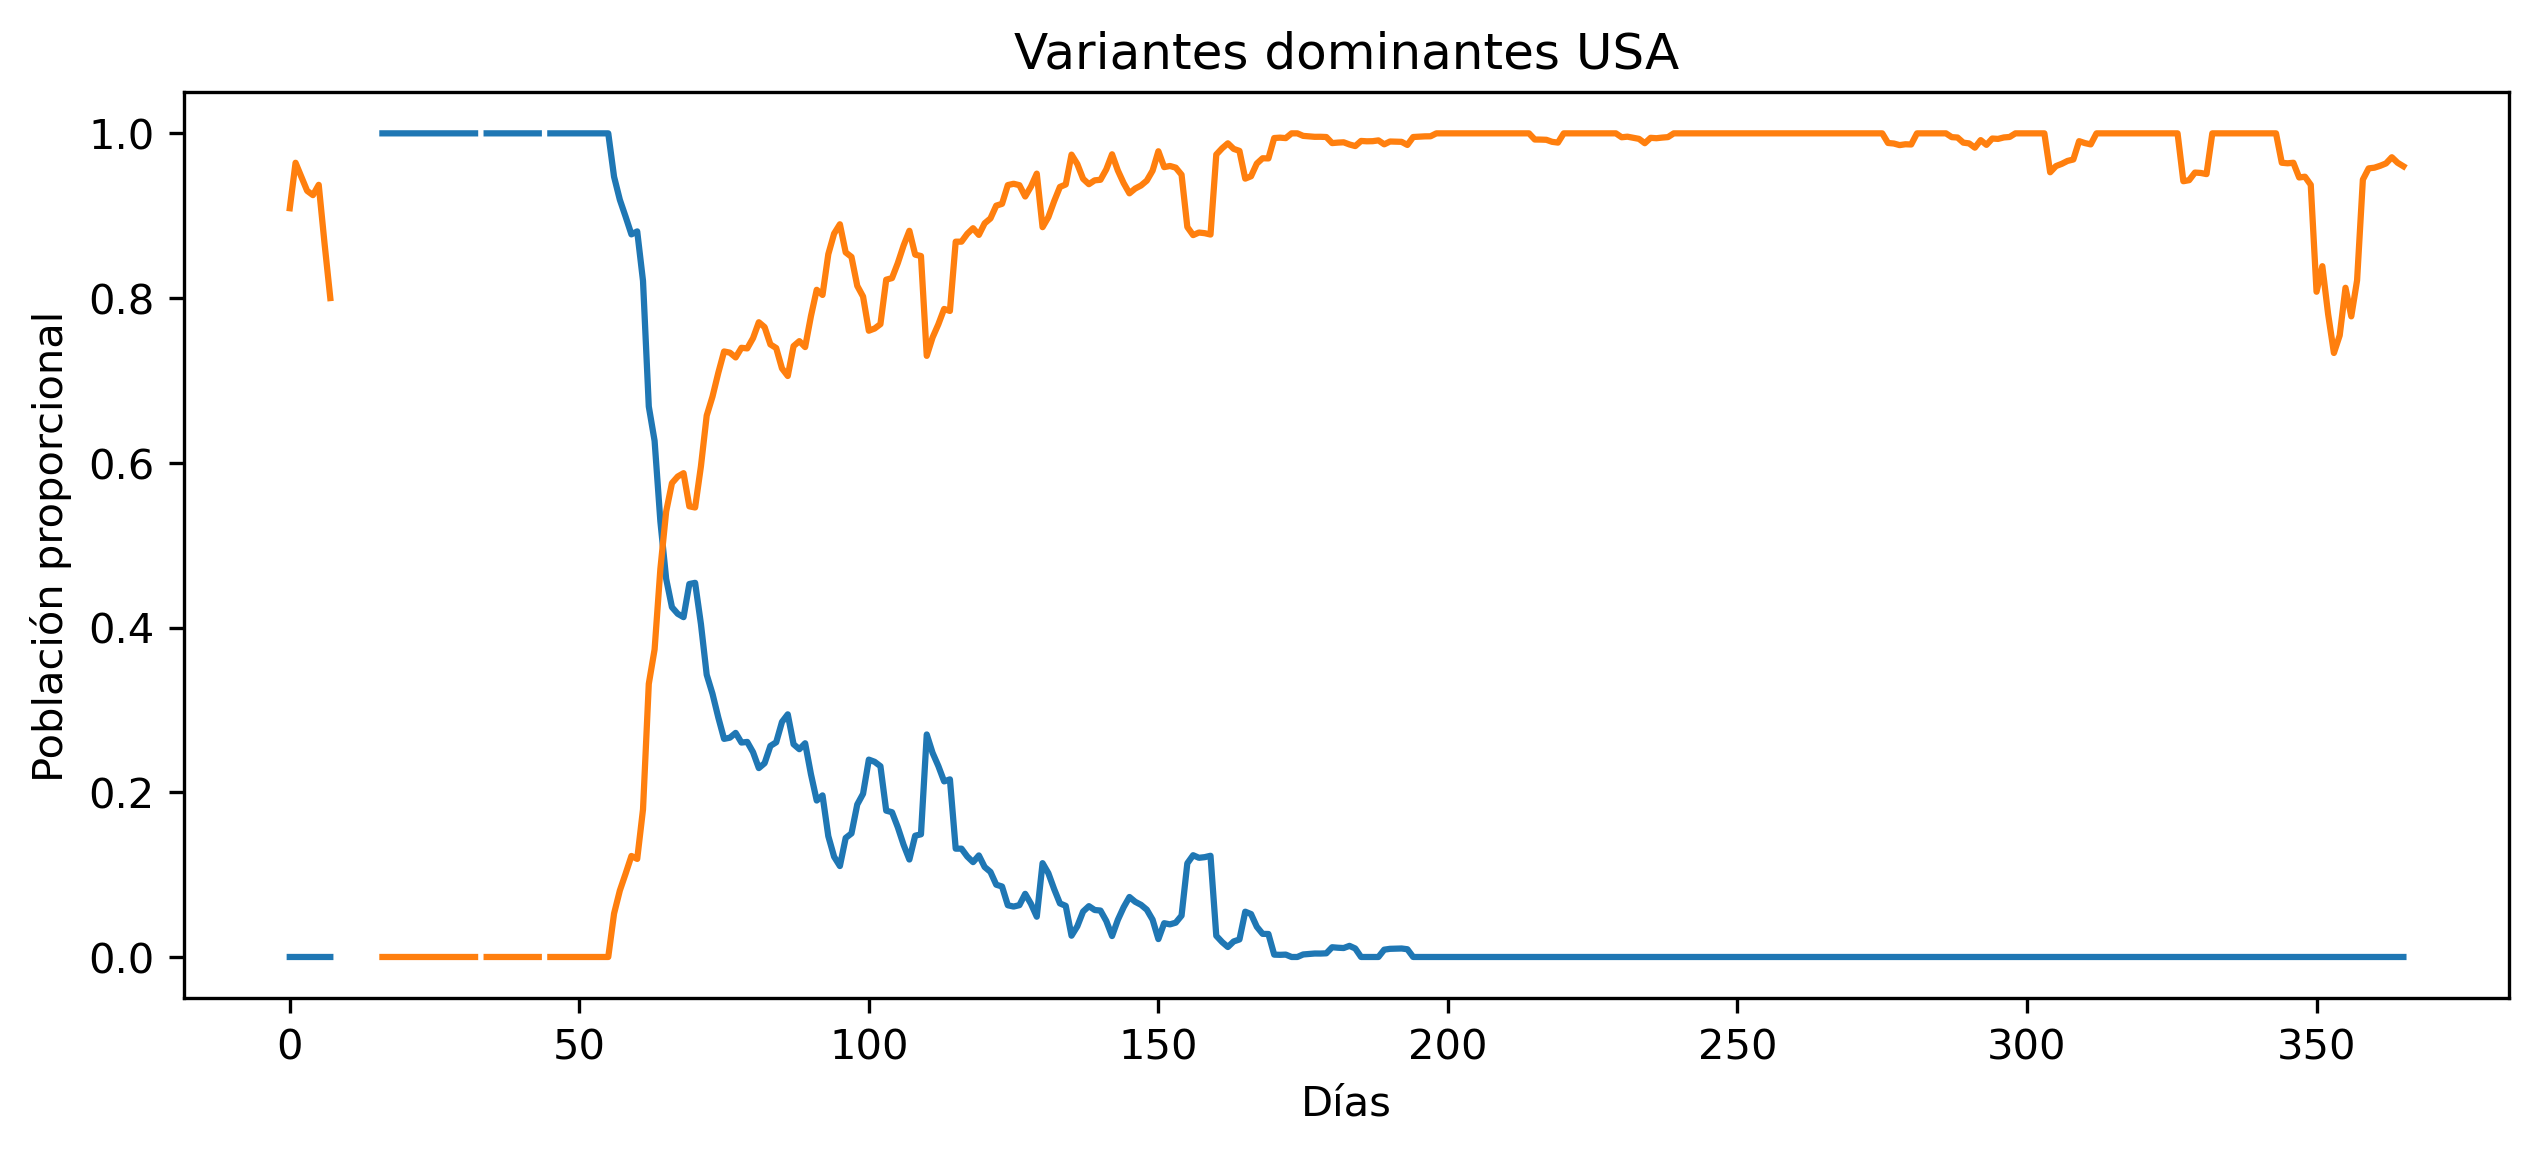

In [8]:
plt.figure(figsize=(10,4), dpi=300)
plt.xlabel("Días")
plt.ylabel("Población proporcional")
plt.title("Variantes dominantes USA")
plt.plot(lst)

### Función INT
```
Algoritmo para calcular un arreglo matricial de un sistema de ecuaciónes para encontrar los parametros LV de cada especie
```
**return** - Retorna un arreglo matricial (n x 6) 

In [44]:
def INT(arr,idx):
    G = arr[:,idx]
    dN, l = np.array([]), []            # lista de listas
    for i in range(0,len(G)-1):
        d = []
        dN_ = (G[i+1] - G[i-1])
        dN = np.append(dN, dN_)
        for j in range(0,arr.shape[1]):
            d_ = G[i+1]*arr[i+1,j] + G[i-1]*arr[i-1,j]
            if (j==idx):
                d.append(d_/2)
            elif (j!=idx):
                d.append(-d_/2)
        l.append(d)
        
    return dN, np.matrix(l)

### Aplicando INT a cada especie con el resto

        a) d - Arreglo de diferencias G[i+1] - G[i]
        b) A - Matriz Integral de la i-esima especie con el resto

In [45]:
d, A = [], []
for i in range(lst.shape[1]):
    d_, A_ = INT(lst, i)
    d.append(d_)
    A.append(A_)
d = np.array(d)
A = np.array(A)

# Solve particular system
tuple(linalg.solve(A[0][60:62],d[0][60:62]))

(0.4461153738355827, 2.9727853985727424)

### Resolver el sistema de ecuaciónes

```Se empleo el Metodo Integral reportado por *Kloppers,P.H y Greeff, J.C, 2013*```

```Se requieren paquetería SciPy.linalg para resolver por metodos del algebra lineal el sistema matricial para encontrar los parametros de Lotka-Volterra de cada una de las species.```

doi: http://dx.doi.org/10.1016/j.amc.2013.08.093

In [46]:
# Ciclo del día 60 al día 120
i = 60
a0, b0, a1, b1 = [], [], [], []
h = A.shape[2]
while (i<160):
    for j in range(0,A.shape[0]):
        a_, b_ = tuple(linalg.solve( A[j][i:i+h], d[j][i:i+h] ))
        if (j==0):
            a0.append(a_)
            b0.append(b_)
        elif (j==1):
            a1.append(a_)
            b1.append(b_)
    i += h

array([0.       , 0.9090909])

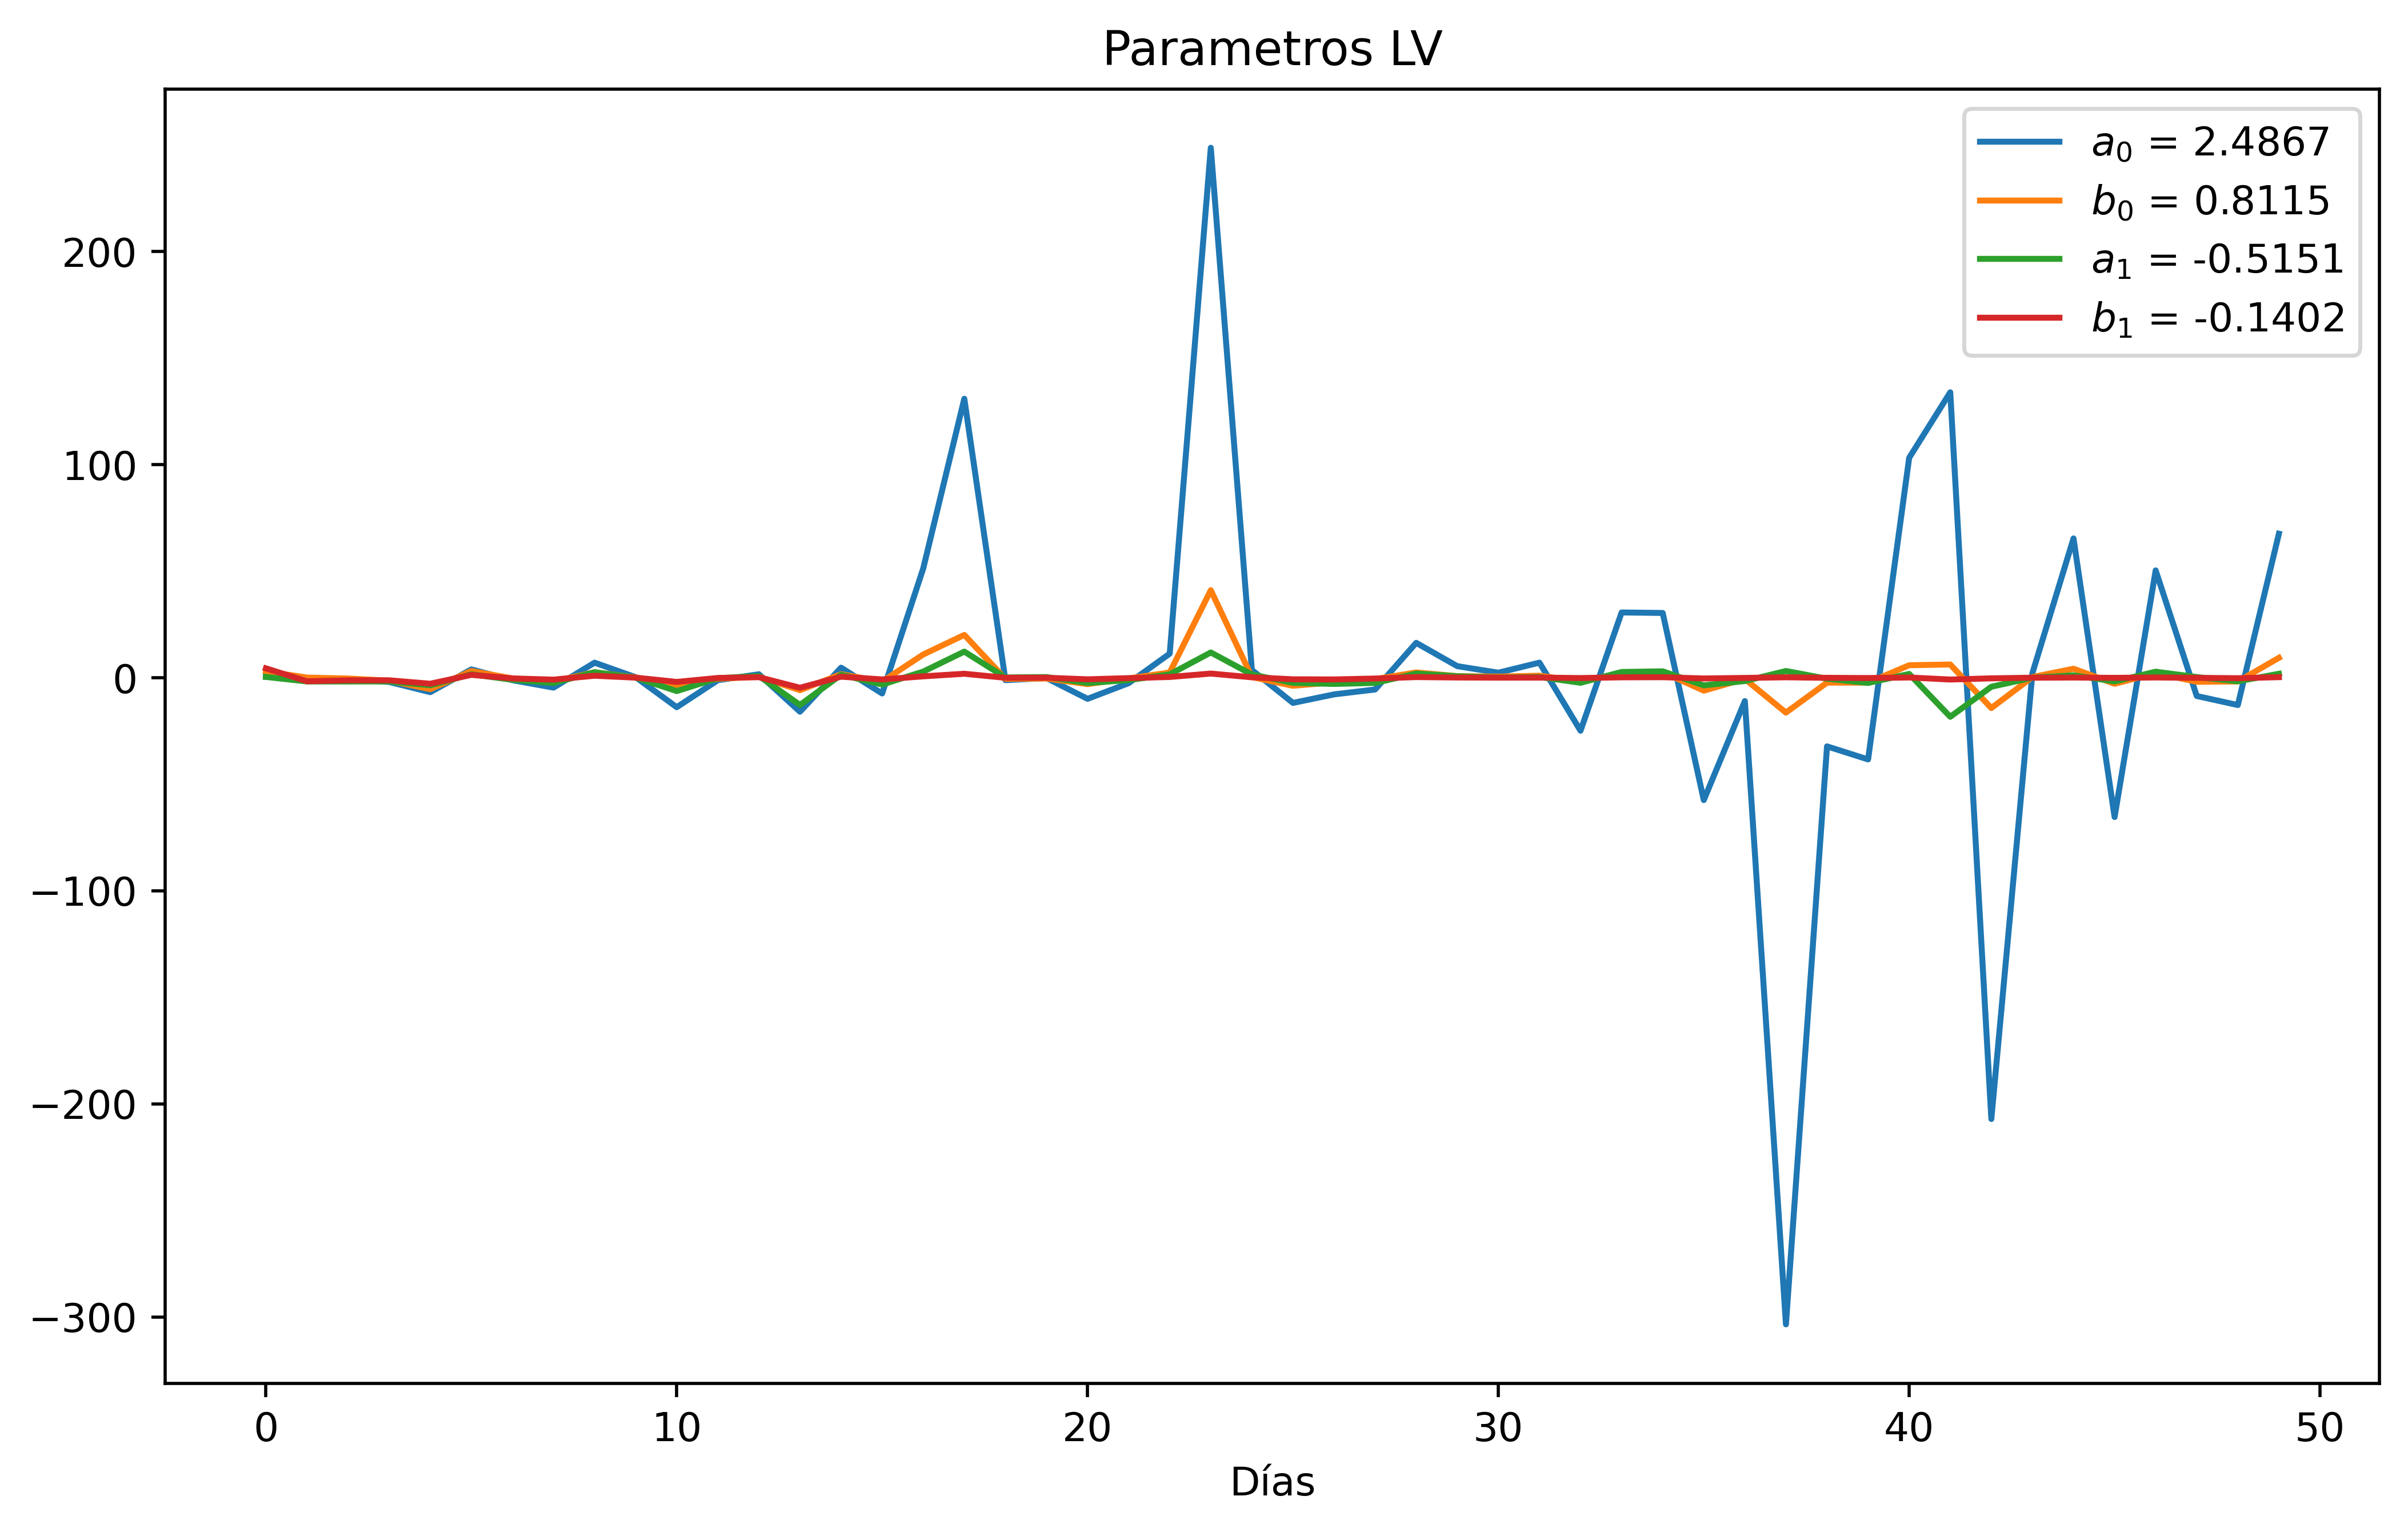

In [48]:
fig = plt.figure(figsize=(10,6),dpi=500)
ax = plt.gca()
ax.set_xlabel("Días")
#ax.set_ylim([np.min([a1,a0,b1,b0]), np.max([a1,a0,b1,b0])])
#ax.set_xlim([0,60])
ax.set_title("Parametros LV")
ax.plot(np.arange(0,len(a0)), a0, label="$a_0$ = {:.4f}". format(np.mean(a0)))
ax.plot(np.arange(0,len(b0)), b0, label="$b_0$ = {:.4f}". format(np.mean(b0)))
ax.plot(np.arange(0,len(a1)), a1, label="$a_1$ = {:.4f}". format(np.mean(a1)))
ax.plot(np.arange(0,len(b1)), b1, label="$b_1$ = {:.4f}". format(np.mean(b1)))
#ax.axis("equal")

plt.legend()

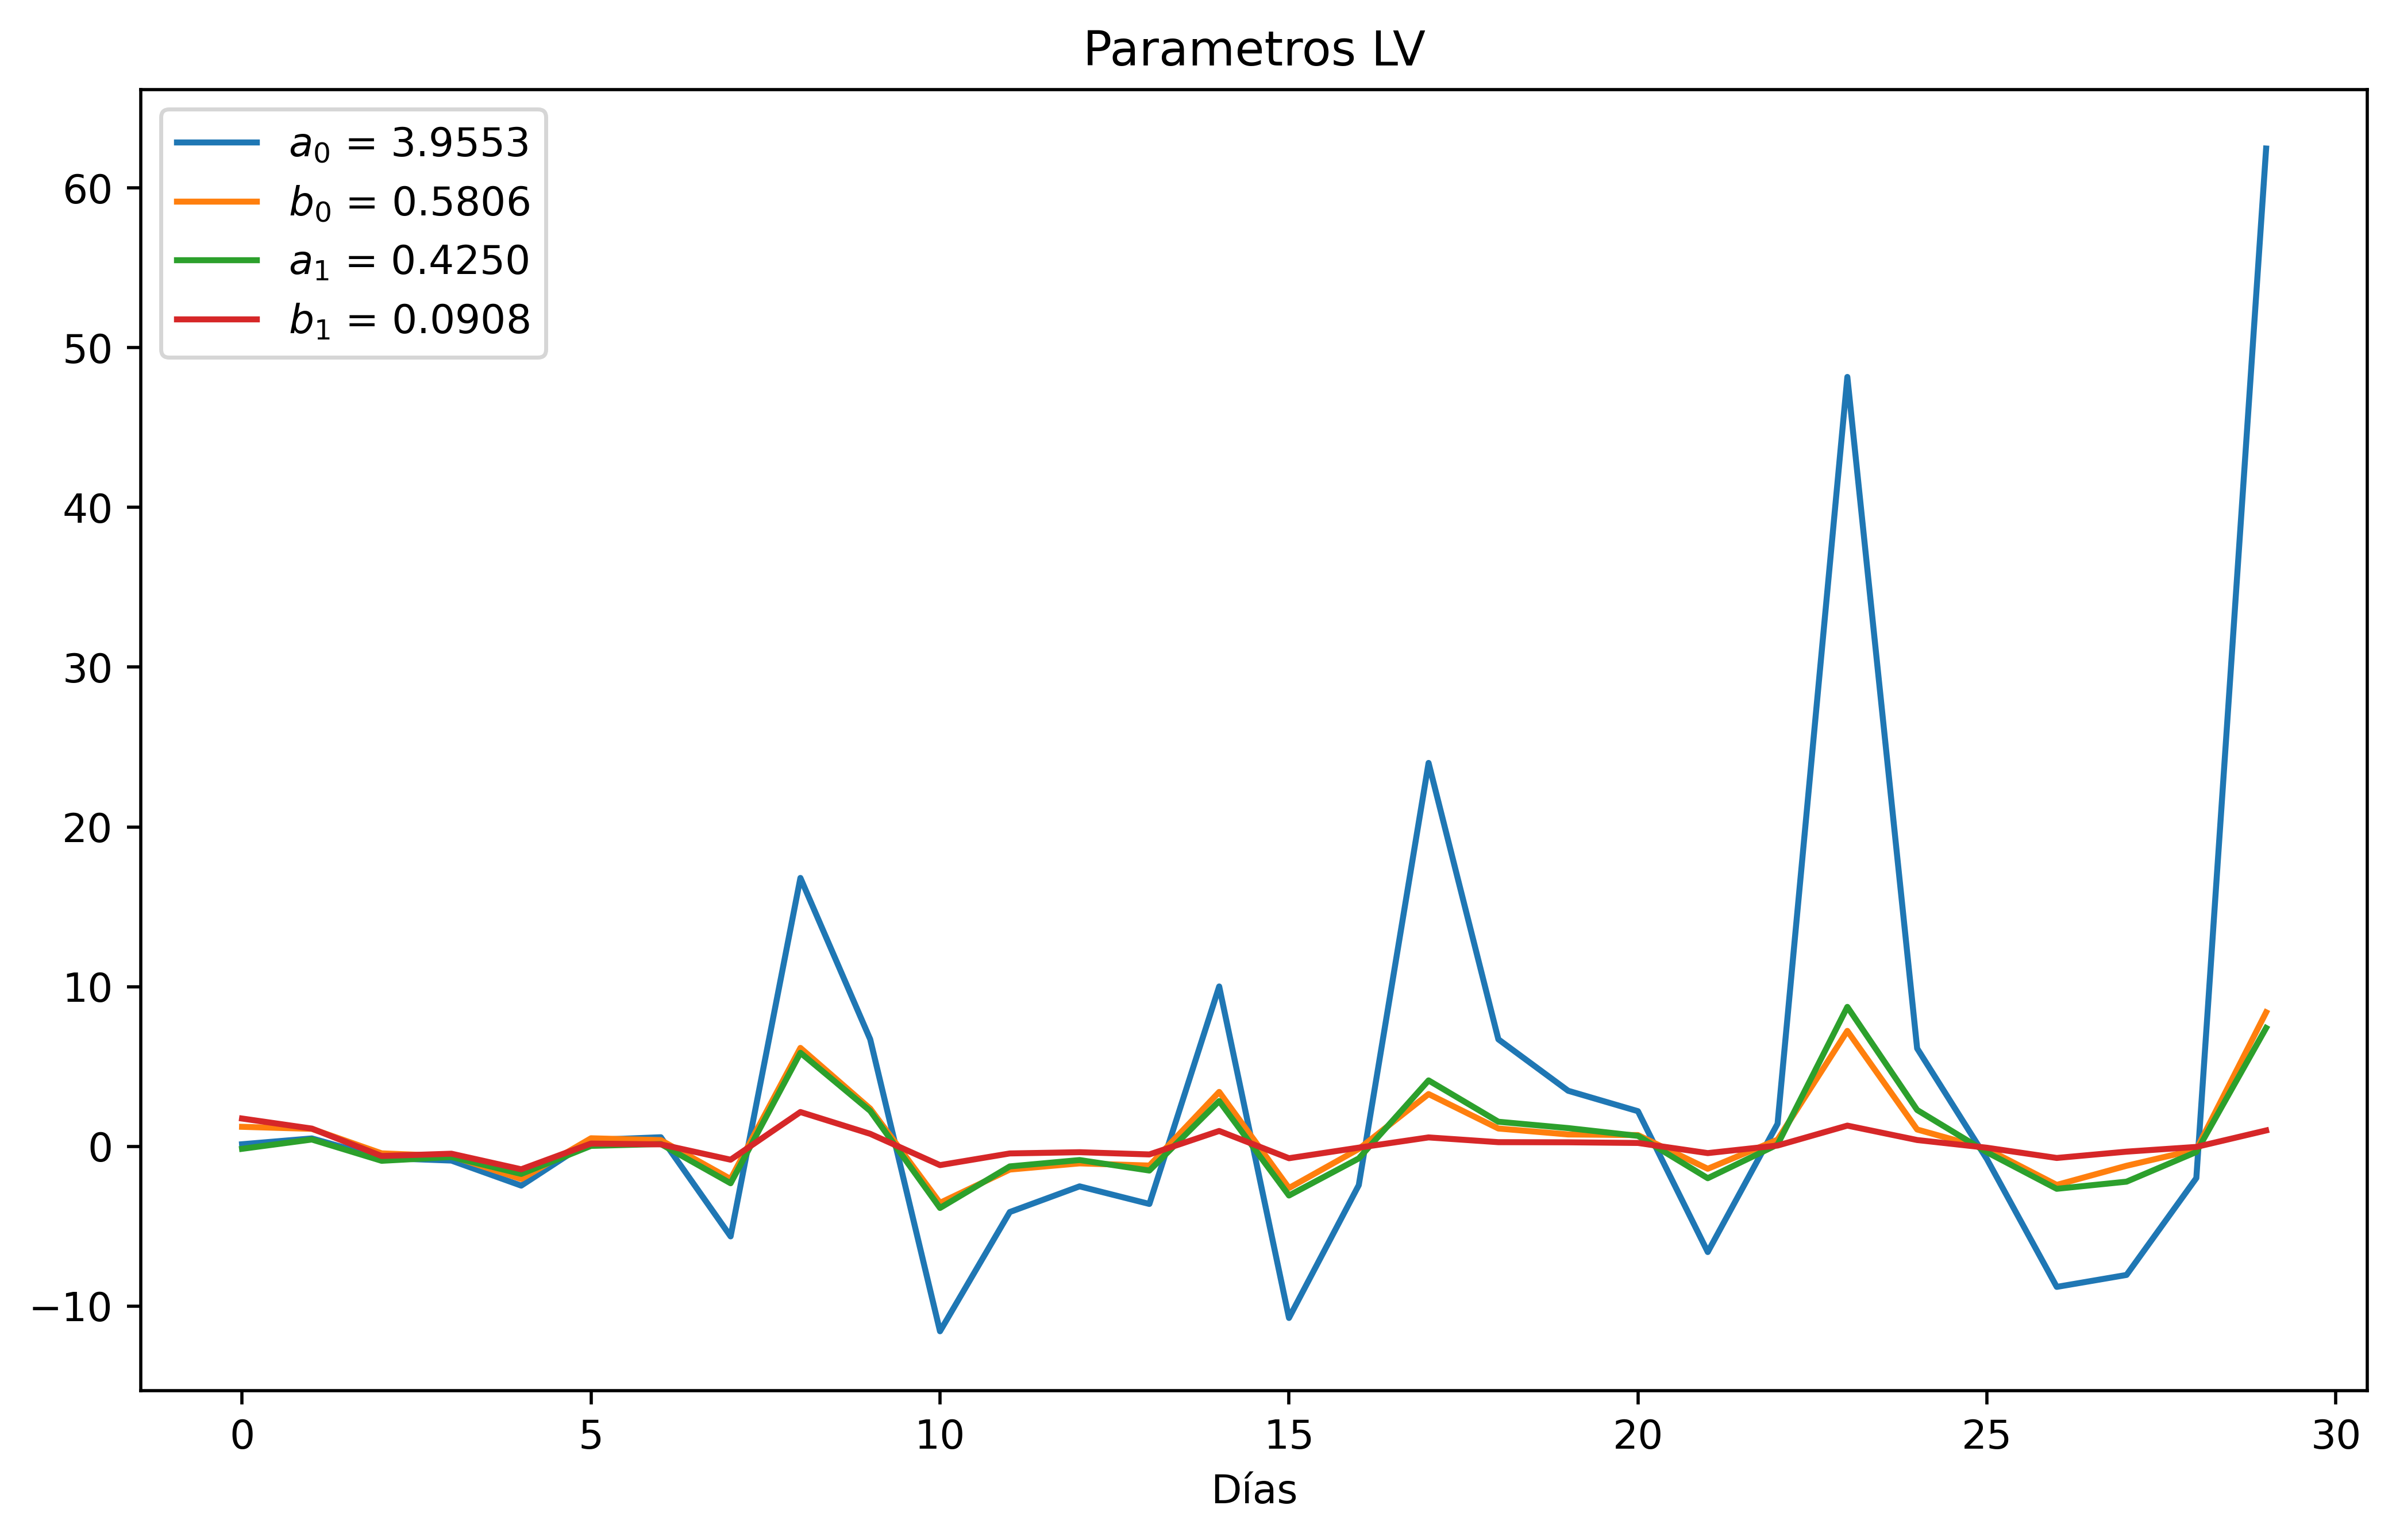

In [13]:
fig = plt.figure(figsize=(10,6),dpi=500)
ax = plt.gca()
ax.set_xlabel("Días")
#ax.set_ylim([np.min([a1,a0,b1,b0]), np.max([a1,a0,b1,b0])])
#ax.set_xlim([0,60])
ax.set_title("Parametros LV")
ax.plot(np.arange(0,len(a0)), a0, label="$a_0$ = {:.4f}". format(np.mean(a0)))
ax.plot(np.arange(0,len(b0)), b0, label="$b_0$ = {:.4f}". format(np.mean(b0)))
ax.plot(np.arange(0,len(a1)), a1, label="$a_1$ = {:.4f}". format(np.mean(a1)))
ax.plot(np.arange(0,len(b1)), b1, label="$b_1$ = {:.4f}". format(np.mean(b1)))
#ax.axis("equal")

plt.legend()

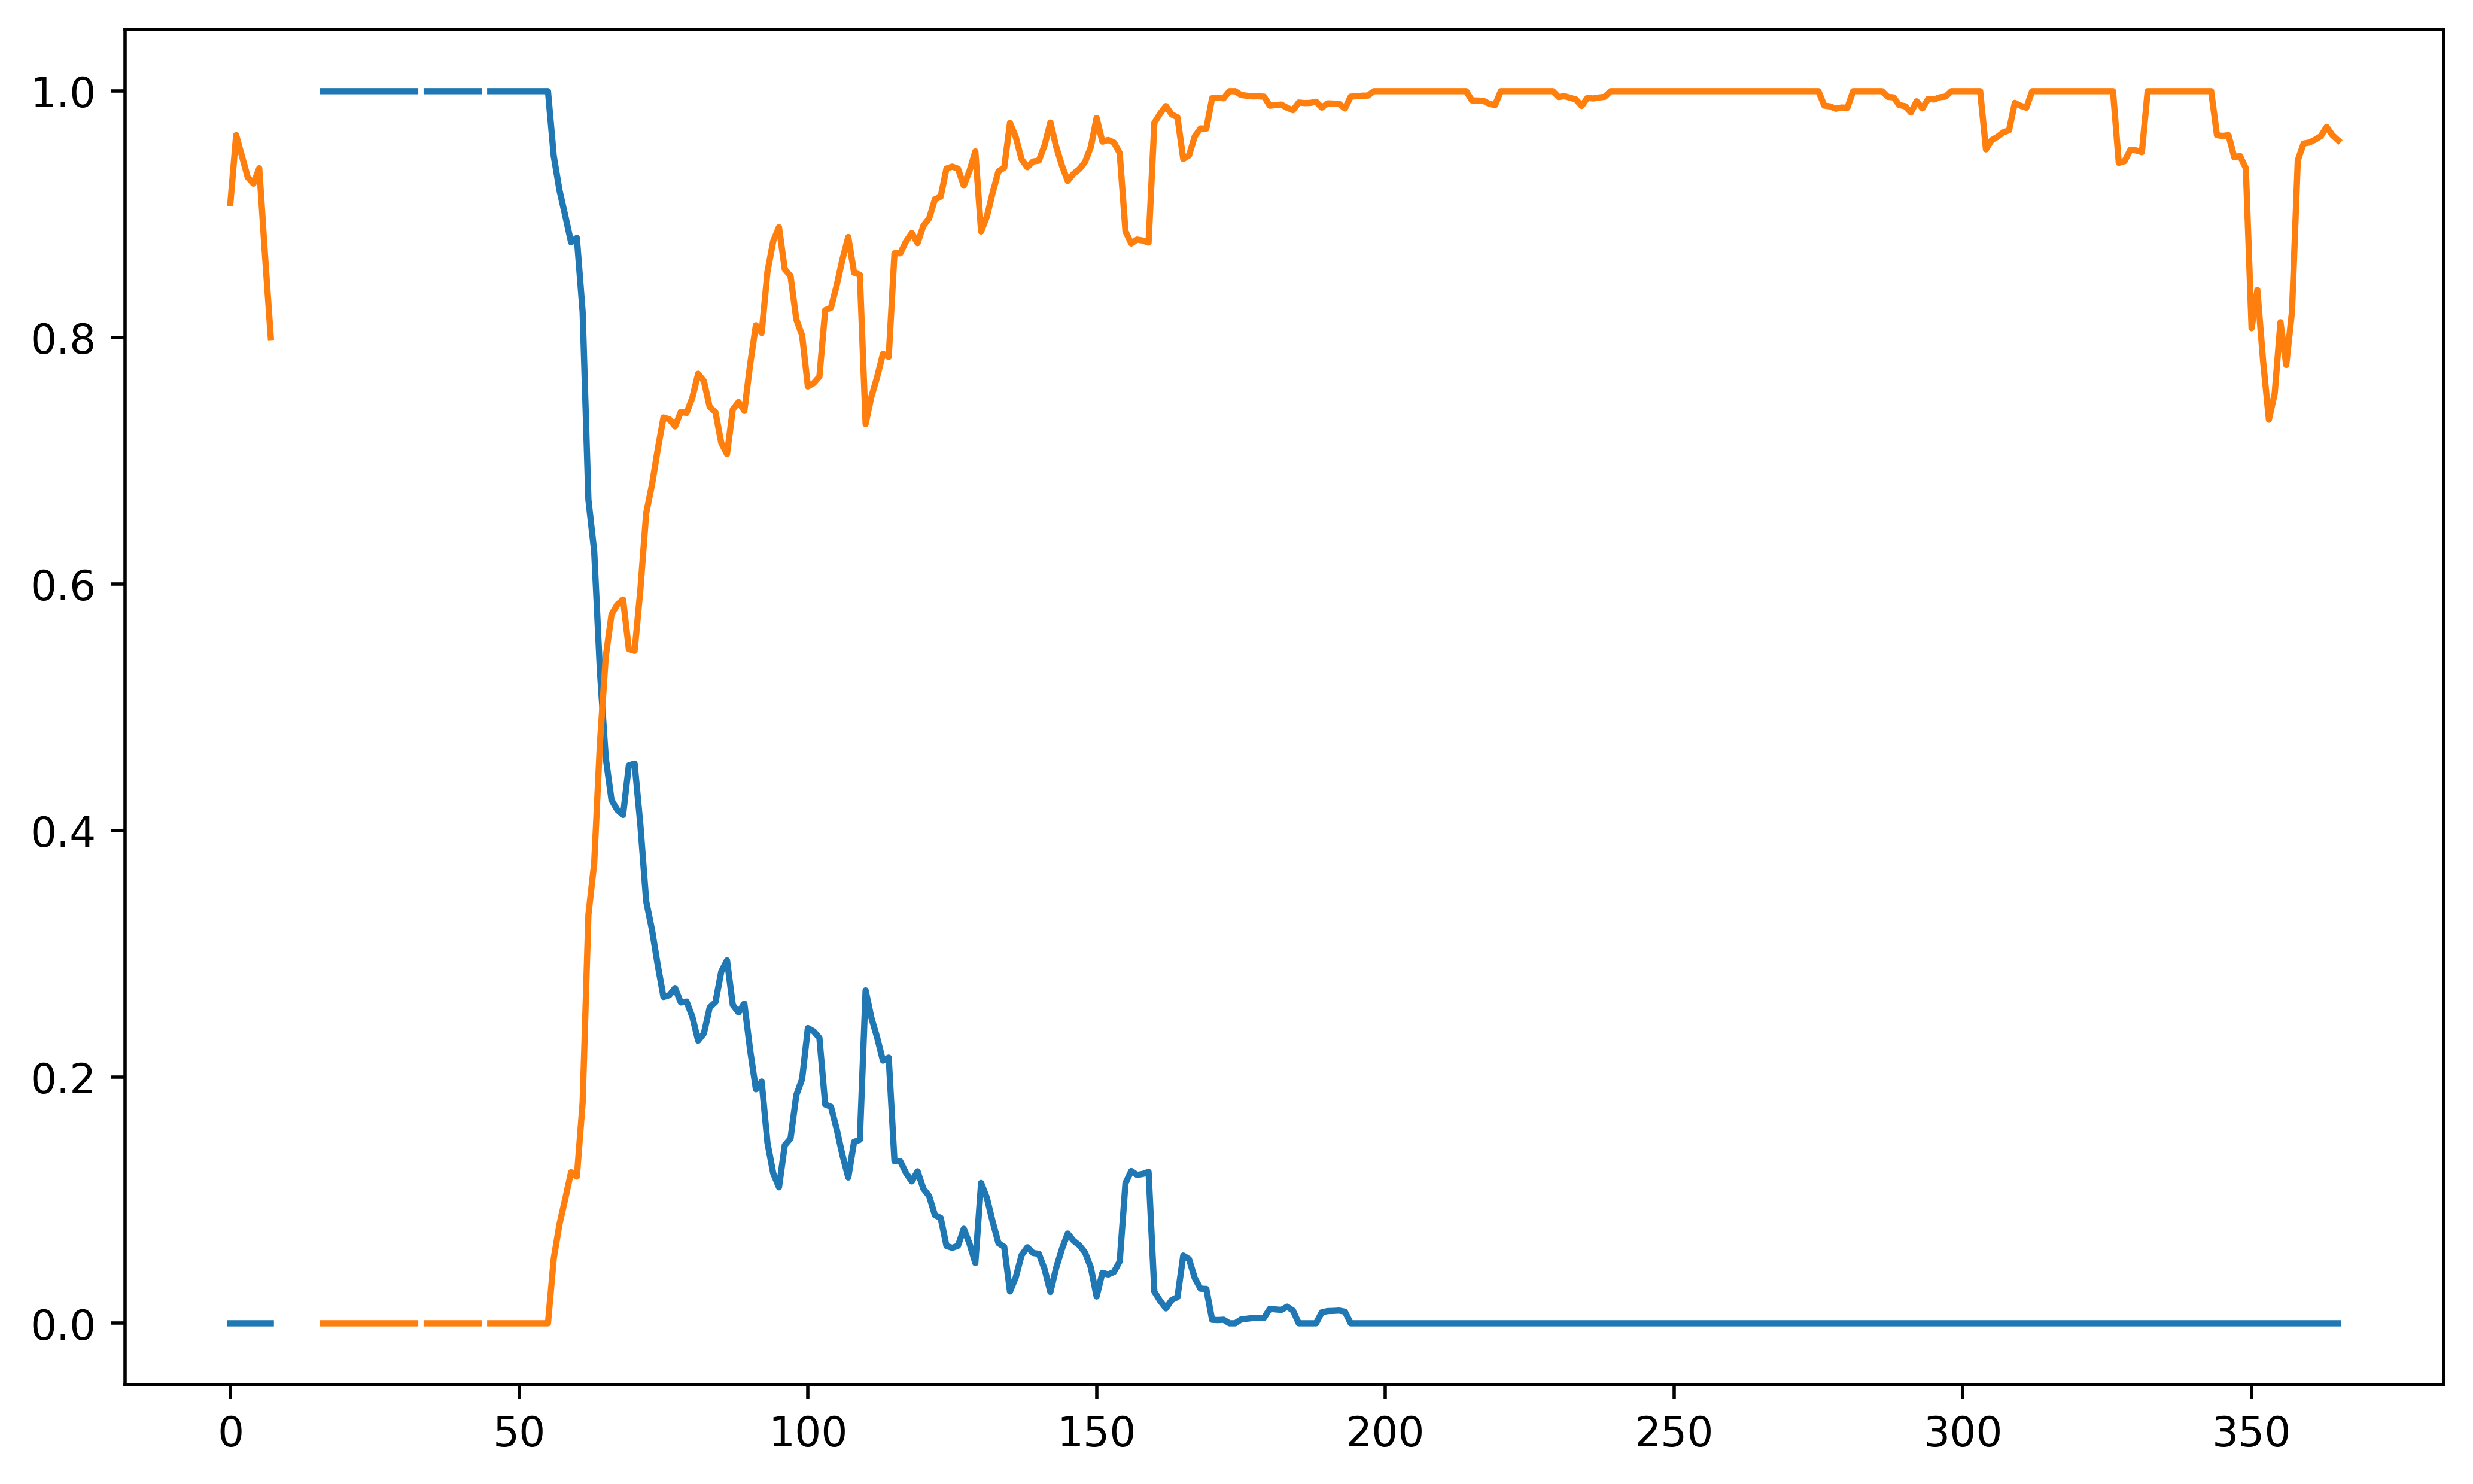

In [14]:
plt.figure(figsize=(10,6), dpi=500)
plt.plot(lst)

## Ajuste de los Datos con el Modelo

1. Distribución del error
2. 